
### 목표
- 손글씨 데이터를 분류하는 딥러닝 모델 설계
- label : 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 -> 총 10개의 class

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # 손글씨 데이터 셋

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

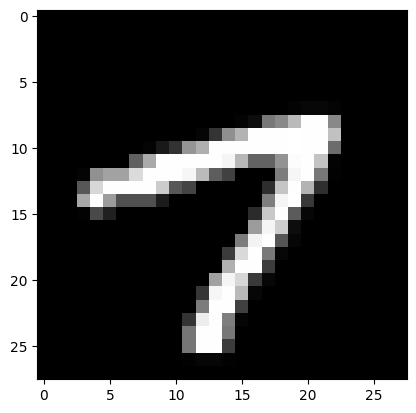

In [ ]:
plt.imshow(X_train[101], cmap='gray')
plt.show()
# 하나의 픽셀 당 0 ~ 255 -> 0 : 검정색, 255 : 흰색

In [ ]:
y_train[101]

7

### MLP 모델링

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
# Flatten : 다차원의 데이터를 1차원의 형태로 변환하는 클래스 -> Dense층은 입력을 1차원 형태로만 받음

In [ ]:
# 1. 신경망 구조 설계

# 뼈대
model = Sequential()

# 입력층
model.add(InputLayer(shape = (28, 28)))

model.add(Flatten()) # 2차원 -> 1차원

# 중간층(은닉층)
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))

# 출력층
model.add(Dense(units = 10, activation = 'softmax'))

# 다중분류 -> 유닛의 수는 클래스값 만큼!, activation은 softmax 고정!

In [1]:
# 2. 학습 방법 설정
model.compile(
    loss = 'sparse_categorical_crossentropy', # 다중 분류의 loss func
    # 'categorical_crossentropy' 도 있음 -> y데이터의 컬럼 개수가 클래스의 개수만큼 존재해야 함!
    metrics = ['accuracy'],
    optimizer = 'adam'
    )

NameError: name 'model' is not defined

In [ ]:
# 3. 학습
h = model.fit(
    X_train, y_train,
    epochs = 20,
    validation_split = 0.2
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7508 - loss: 0.8353 - val_accuracy: 0.9310 - val_loss: 0.2532
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9328 - loss: 0.2395 - val_accuracy: 0.9388 - val_loss: 0.2210
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9478 - loss: 0.1877 - val_accuracy: 0.9552 - val_loss: 0.1747
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9584 - loss: 0.1534 - val_accuracy: 0.9577 - val_loss: 0.1544
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9622 - loss: 0.1385 - val_accuracy: 0.9559 - val_loss: 0.1729
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9679 - loss: 0.1148 - val_accuracy: 0.9574 - val_loss: 0.1674
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9673 - loss: 0.1153 - val_accuracy: 0.9607 - val_loss: 0.1557
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9709 - loss: 0.1028

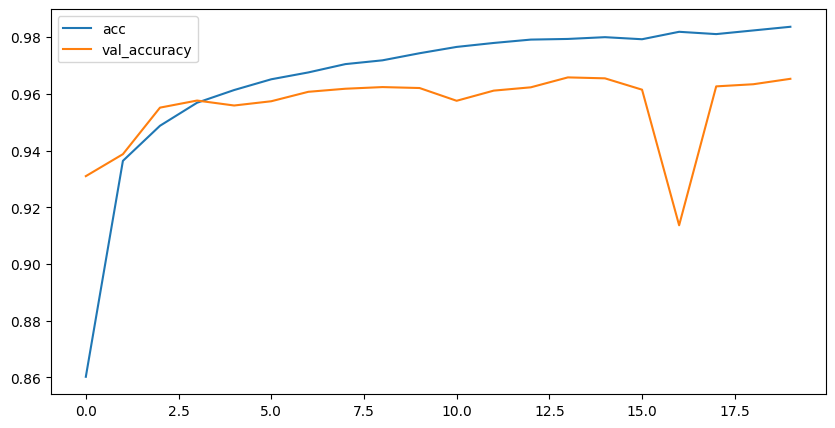

In [ ]:
# 4. 평가
plt.figure(figsize = (10, 5))
plt.plot(h.history['accuracy'], label = 'acc')
plt.plot(h.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

#### callback 함수
- 지정 된 epochs를 다 끝낼 경우 과대적합이 생길 수도 있음
- 학습 도중에 모델을 저장 -> ModelCheckpoint
- 조기 학습 중단 -> EarlyStopping


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/인사교/DL

In [ ]:
!pwd

In [ ]:
# 모델 저장
model.save('./data/hand_model.keras') # 옛날꺼 확장자 : hdf5, h5

In [ ]:
# 모델 불러오기
from tensorflow.keras.models import load_model
loaded_model = load_model('./data/hand_model.keras')

In [ ]:
# 불러온 모델 예측 수행해보기!
loaded_model.predict(X_test)[0].argmax()

In [ ]:
X_test[0]

In [ ]:
# callback 사용해보기!
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# 저장할 모델의 파일명과 경로 지정
model_path = './data/hand_model-{epoch:03d}-{val_accuracy:.4f}.keras'
# 03d -> 10진수 3자리로 표현
# .4f -> 소수점 4자리까지 표현

In [ ]:
model_checkpoint_callback = ModelCheckpoint(
    filepath = model_path,
    monitor = 'val_accuracy', # 검증 정확도를 기준
    save_best_only = True, # 나아진 모델만 저장
    verbose = 1
)

In [ ]:
# 전보다 나아지지 않으면 학습 중단
early_stop_callback = EarlyStopping(
    monitor = 'val_accuracy',
    patience = 5 # 학습 중단을 위한 조건, monitor(검증 정확도)를 기준으로 5번의 에포크 동안 성능이 향상되지 않으면 조기 중단!
)

In [ ]:
# 1. 신경망 구조 설계

# 뼈대
model2 = Sequential()

# 입력층
model2.add(InputLayer(shape = (28, 28)))

model2.add(Flatten()) # 2차원 -> 1차원

# 중간층(은닉층)
model2.add(Dense(units = 32, activation = 'relu'))
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dense(units = 128, activation = 'relu'))
model2.add(Dense(units = 256, activation = 'relu'))
model2.add(Dense(units = 128, activation = 'relu'))
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dense(units = 32, activation = 'relu'))

# 출력층
model2.add(Dense(units = 10, activation = 'softmax'))

# 다중분류 -> 유닛의 수는 클래스값 만큼!, activation은 softmax 고정!

In [ ]:
# 2. 학습 방법 설정
model2.compile(
    loss = 'sparse_categorical_crossentropy', # 다중 분류의 loss func
    # 'categorical_crossentropy' 도 있음 -> y데이터의 컬럼 개수가 클래스의 개수만큼 존재해야 함!
    metrics = ['accuracy'],
    optimizer = 'adam'
    )

In [ ]:
# 3. 학습
h = model2.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    callbacks = [model_checkpoint_callback, early_stop_callback],
    epochs = 50
)

In [ ]:
# 학습결과가 좋은 모델 불러오기
loaded_model2 = load_model('./data/hand_model-011-0.9714.keras')

In [ ]:
loaded_model2.predict(X_test)[9000].argmax()

In [ ]:
y_test[9000]

- model의 성능을 직접 확인하기 위해, 손글씨 데이터를 만들어서 예측해보자!

In [ ]:
import PIL.Image as pimg # 사진 파일 다루는 라이브러리
img = pimg.open('./data/img.gif')

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
# 다루기 쉽게 ndarray 형변환
img = np.array(img)

In [ ]:
# 색상 반전
255 - img

In [ ]:
# 차원수정
img = img.reshape(1, 28, 28)

In [ ]:
loaded_model2.predict(img).argmax()